<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_02_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shiva Sawant Tech 27 ML Homework Main Assignment 02 Due 7/22/25**

**Part 1: Load and Explore the Dataset** (10)

Upload the CSV file named adult.csv (also known as the Census Income dataset) from your local computer.

After uploading, load the CSV file into a Pandas DataFrame called df using the
pd.read_csv() function.
1. Upload the file adult.csv to your working environment (e.g., JupyterLab or Google
Colab).
2. Load the CSV data into a DataFrame named df using pd.read_csv().
3. Display the number of rows and columns in df using the .shape attribute.
4. Display the first five rows of df using the .head() method.

In [1]:
import pandas as pd

# Step 1: Upload the file adult.csv
# Do a manual upload of adult.csv in Colab from the file downloaded on PC from Canvas.
# Steps:1a) click the folder icon on the left ->
#       1b) "Upload to session storage" icon
#       1c) select your 'adult.csv' file from your local computer downloads directory.
print("\nAnswer Part 1, step 1 : \nIn Colab, 'adult.csv' file has been manually uploaded using the 'Files' icon on the left sidebar.")

# Step 2: Load the CSV data into a DataFrame named df
# Step 1a-1c has brought 'adult.csv' in the current Colab session directory
try:
    df = pd.read_csv('adult.csv')
    print("\nAnswer Part 1, step 2 : \nSuccessfully loaded 'adult.csv' into DataFrame 'df'.")

# Step 3: Display the number of rows and columns in df
    print("\nAnswer Part 1, step 3 : \nShape of the DataFrame (rows, columns):", df.shape)

# Step 4: Display the first five rows of df ---
    print("\nAnswer Part 1, step 4 : \nFirst five rows of the DataFrame:")
    print(df.head())

except FileNotFoundError:
    print("\nError: 'adult.csv' not found. Please ensure the file is uploaded to the Colab session.")
except Exception as e:
    print(f"\nAn error occurred: {e}")


Answer Part 1, step 1 : 
In Colab, 'adult.csv' file has been manually uploaded using the 'Files' icon on the left sidebar.

Error: 'adult.csv' not found. Please ensure the file is uploaded to the Colab session.


**Part 2: Create a Regression Label via Winsorization** (15)
1. Create a new column label by applying winsorization (top and bottom 1%) to the education-num column using scipy.stats.mstats.winsorize.
2. Verify that the new column was added by displaying the first few rows.
3. Check whether label and education-num differ by subtracting the two and
examining the unique values of the result.

In [2]:
# Notes:
# Winsorization is a statistical method used to handle extreme values or outliers in a dataset.
# Instead of completely removing these outliers (a method called "trimming" or "truncation"),
# Winsorization involves capping or replacing the most extreme values with less extreme values from the same dataset.
# Winsorization strikes a balance between completely discarding extreme observations and
# allowing them to disproportionately influence statistical analysis.

In [2]:
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np # Often useful for numerical operations

# Step 1: Load the adult.csv data into a DataFrame named df ---
try:
    df = pd.read_csv('adult.csv')
    print("\nAnswer Part2, Step 1:")
    print("-" * 22)
    print("DataFrame 'adult.csv' loaded successfully.")
    print("Original DataFrame shape:", df.shape)
    print("\nOriginal 'education.num' column statistics:")
    print(df['education.num'].describe())

except FileNotFoundError:
    print("Error: 'adult.csv' not found. Please ensure the file is uploaded to the Colab session.")
    # Exit or handle the error appropriately if the file isn't found
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()


# Step 2a: Apply Winsorization to the 'education.num' column
# Apply top and bottom 1% winsorization.
# The 'limits' parameter takes a tuple (lower_limit, upper_limit).
# 0.01 means 1% from the bottom and 1% from the top.
print("\n\nAnswer Part2, Step 2 a:")
print("-" * 22)
df['education.num_winsorized'] = winsorize(df['education.num'], limits=(0.01, 0.01))
print("Applied Winsorization to the 'education.num' column")
print("Windorized DataFrame shape:", df.shape)


# Step 2b: Display the first five rows of df with the new column
print("\n\nAnswer Part2, Step 2 b1:")
print("-" * 24)
print("First five rows of the DataFrame after Winsorization, showing new education.num_winsorized column:")
print(df.head())

print("\n\nAnswer Part2, Step 2 b2:")
print("-" * 24)
print("DataFrame head with with the original education.num and the new 'education.num_winsorized' column:")
print(df[['education.num', 'education.num_winsorized']].head())


# Step 3 Check the difference between the original and winsorized columns ---
# Subtract the winsorized column from the original
print("\n\n\n\nAnswer Part2, Step 3:")
print("-" * 22)
difference = df['education.num'] - df['education.num_winsorized']

# Get the unique values of the difference
unique_differences = difference.unique()

print("Verification of Winsorization Effect")
print("Unique differences between 'education.num' and 'education.num_winsorized':")
print(np.sort(unique_differences)) # Sort for better readability

# Interpret the results
print("\n\nInterpretation of results for validation:")
print("-" * 42)
if len(unique_differences) == 1 and unique_differences[0] == 0:
    print("Result: The columns are identical. This is unexpected if winsorization occurred.")
    print("This might happen if your data has no outliers at the 1st/99th percentiles,")
    print("or if the winsorization limits were too wide.")
else:
    print("\nResult: The columns differ where winsorization was applied.")
    print("Non-zero values indicate where original extreme values were capped.")
    print("Positive values mean the original value was higher than the cap.")
    print("Negative values mean the original value was lower than the cap.")

print("\n--- Original and Winsorized Column Statistics for context ---")
print("Original 'education.num' column statistics:")
print(df['education.num'].describe())
print("\nWinsorized 'education.num_winsorized' column statistics:")
print(df['education.num_winsorized'].describe())


# Warnings explainations
print("\n\n")
print("-" * 80)
print("Warnings reported by Numpy libraries are showing up at the bottom of output due to unmasked data points:\n")
print("The scipy.stats.mstats.winsorize function is built to correctly handle masked data.\n It will ensure that the percentiles used for capping are calculated only from the valid (unmasked) data points.\n The warning is more of an internal implementation detail of NumPy's partition and how it interacts with the MaskedArray structure at a low level.\n This not an indication that winsorization is incorrect.")
print("\nThese warnings can be ignored")
print("-" * 80)
print("\n")




Answer Part2, Step 1:
----------------------
DataFrame 'adult.csv' loaded successfully.
Original DataFrame shape: (32561, 15)

Original 'education.num' column statistics:
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


Answer Part2, Step 2 a:
----------------------
Applied Winsorization to the 'education.num' column
Windorized DataFrame shape: (32561, 16)


Answer Part2, Step 2 b1:
------------------------
First five rows of the DataFrame after Winsorization, showing new education.num_winsorized column:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


**Part 3: Handling Missing Values** (20)
1. Count and display the total number of missing values per column.
2. Create new columns age_na and hours-per-week_na that store Boolean indicators
for missing values in the age and hours-per-week columns.
3. Impute missing values in age and hours-per-week with the respective column
means.
4. Recheck the dataset to confirm that missing values have been filled

In [6]:
import numpy as np
# In adult.csv the missing data cells are marked as '?' as it is a legacy dataset.
# We can count '?', however the norm is to use NaN
# NaN is preferred for following reasons:
#   Compatibility with Libraries like Pandas and Nymph
#   Data Type Consistency (numerical v/s string)
#   Clearer Semantics (? can be confused as string)
#   Ease of Use

# So replace '?' with NaN to use the library
df.replace('?', np.nan, inplace=True)

print("\n\nAnswer Part3, Step 1:")
print("-" * 22)
# Recalculate and display the total number of missing values per column
print("Missing values per column after replacing '?':\n")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Calculate and display the total number of '?' values present in the entire dataframe
# This effectively shows that all '?' have been replaced by checking if any '?' still exist
total_q_marks = df.isin(['?']).sum().sum()
print(f"\nTotal number of '?' values in the DataFrame after replacement: {total_q_marks}")

Missing values per column after replacing '?':

|                          | 0    |
|:-------------------------|:-----|
| age                      | 0    |
| workclass                | 1836 |
| fnlwgt                   | 0    |
| education                | 0    |
| education.num            | 0    |
| marital.status           | 0    |
| occupation               | 1843 |
| relationship             | 0    |
| race                     | 0    |
| sex                      | 0    |
| capital.gain             | 0    |
| capital.loss             | 0    |
| hours.per.week           | 0    |
| native.country           | 583  |
| income                   | 0    |
| education.num_winsorized | 0    |

Total number of '?' values in the DataFrame after replacement: 0


In [18]:


print("\n\nAnswer Part3, Step 2:")
print("-" * 22)
# --- Create new columns for missing value indicators ---

# Check if 'age' column exists before creating indicator
if 'age' in df.columns:
    df['age_na'] = df['age'].isnull()
    print("\n'age_na' column created successfully.")
else:
    print("\nWarning: 'age' column not found in DataFrame. 'age_na' not created.")

# Check if 'hours.per.week' column exists before creating indicator
if 'hours.per.week' in df.columns: # Changed from 'hours-per-week' to 'hours.per.week'
    df['hours.per.week_na'] = df['hours.per.week'].isnull() # Changed column name
    print("'hours.per.week_na' column created successfully.") # Changed print message
else:
    print("\nWarning: 'hours.per.week' column not found in DataFrame. 'hours.per.week_na' not created.") # Changed print message

print("\n\n\n Additional step : Verifying new columns age_na & hour.per.week_na have been created")

# --- Display the first few rows to verify the new columns ---
print("\n--- DataFrame Head with New Missing Indicator Columns ---")
# Select relevant columns to display for verification
columns_to_show = []
if 'age' in df.columns:
    columns_to_show.append('age')
    columns_to_show.append('age_na')
if 'hours.per.week' in df.columns: # Changed from 'hours-per-week' to 'hours.per.week'
    columns_to_show.append('hours.per.week') # Changed column name
    columns_to_show.append('hours.per.week_na') # Changed column name
if 'education.num' in df.columns: # Also show the winsorized column for context
    columns_to_show.append('education.num')
    columns_to_show.append('education.num_winsorized')


if columns_to_show:
    print(df[columns_to_show].head())
else:
    print("No relevant columns to display as 'age' or 'hours.per.week' were not found.") # Changed message

# --- Optional: Count missing values in the new indicator columns (should be 0) ---
print("\n--- Missing values in indicator columns (should be 0) ---")
if 'age_na' in df.columns:
    print(f"Missing values in 'age_na': {df['age_na'].isnull().sum()}")
if 'hours.per.week_na' in df.columns: # Changed from 'hours-per-week_na' to 'hours.per.week_na'
    print(f"Missing values in 'hours.per.week_na': {df['hours.per.week_na'].isnull().sum()}") # Changed message




Answer Part3, Step 2:
----------------------

'age_na' column created successfully.
'hours.per.week_na' column created successfully.



 Additional step : Verifying new columns age_na & hour.per.week_na have been created

--- DataFrame Head with New Missing Indicator Columns ---
   age  age_na  hours.per.week  hours.per.week_na  education.num  \
0   90   False              40              False              9   
1   82   False              18              False              9   
2   66   False              40              False             10   
3   54   False              40              False              4   
4   41   False              40              False             10   

   education.num_winsorized  
0                         9  
1                         9  
2                        10  
3                         4  
4                        10  

--- Missing values in indicator columns (should be 0) ---
Missing values in 'age_na': 0
Missing values in 'hours.per.week_na': 0

In [17]:

print("\n\nAnswer Part3, Step 3:")
print("-" * 22)
# --- Impute missing values with column means ---
print("\n--- Imputing Missing Values ---")
if 'age' in df.columns:
    age_mean = df['age'].mean()
    # Corrected line to avoid FutureWarning
    df['age'] = df['age'].fillna(age_mean)
    print(f"Missing values in 'age' imputed with mean: {age_mean:.2f}")
else:
    print("Skipping imputation for 'age' as column not found.")

if 'hours.per.week' in df.columns:
    hours_per_week_mean = df['hours.per.week'].mean()
    # Corrected line to avoid FutureWarning
    df['hours.per.week'] = df['hours.per.week'].fillna(hours_per_week_mean)
    print(f"Missing values in 'hours.per.week' imputed with mean: {hours_per_week_mean:.2f}")
else:
    print("Skipping imputation for 'hours.per.week' as column not found.")


# --- Display the first few rows to verify the new columns and imputation ---
print("\n--- DataFrame Head with New Missing Indicator Columns and Imputed Values ---")
# Select relevant columns to display for verification
columns_to_show = []
if 'age' in df.columns:
    columns_to_show.append('age')
    columns_to_show.append('age_na')
if 'hours.per.week' in df.columns:
    columns_to_show.append('hours.per.week')
    columns_to_show.append('hours.per.week_na')
if 'education.num' in df.columns:
    columns_to_show.append('education.num')
    columns_to_show.append('education.num_winsorized')


if columns_to_show:
    print(df[columns_to_show].head())
else:
    print("No relevant columns to display as 'age' or 'hours.per.week' were not found.")





Answer Part3, Step 3:
----------------------

--- Imputing Missing Values ---
Missing values in 'age' imputed with mean: 38.58
Missing values in 'hours.per.week' imputed with mean: 40.44

--- DataFrame Head with New Missing Indicator Columns and Imputed Values ---
   age  age_na  hours.per.week  hours.per.week_na  education.num  \
0   90   False              40              False              9   
1   82   False              18              False              9   
2   66   False              40              False             10   
3   54   False              40              False              4   
4   41   False              40              False             10   

   education.num_winsorized  
0                         9  
1                         9  
2                        10  
3                         4  
4                        10  


In [16]:

print("\n\nAnswer Part3, Step 4:")
print("-" * 22)

# --- Verify no more missing values in imputed columns ---
print("\n--- Missing values count after imputation (should be 0 for imputed columns) ---")
# Re-checking missing values specifically for 'age' and 'hours.per.week'
if 'age' in df.columns:
    print(f"Missing values in 'age': {df['age'].isnull().sum()}")
if 'hours.per.week' in df.columns:
    print(f"Missing values in 'hours.per.week': {df['hours.per.week'].isnull().sum()}")

# Also show for the indicator columns, which should always be 0
if 'age_na' in df.columns:
    print(f"Missing values in 'age_na': {df['age_na'].isnull().sum()}")
if 'hours.per.week_na' in df.columns:
    print(f"Missing values in 'hours.per.week_na': {df['hours.per.week_na'].isnull().sum()}")

print("\n--- Full Missing Values Count Across All Columns After Imputation ---")
print(df.isnull().sum())



Answer Part3, Step 4:
----------------------

--- Missing values count after imputation (should be 0 for imputed columns) ---
Missing values in 'age': 0
Missing values in 'hours.per.week': 0
Missing values in 'age_na': 0
Missing values in 'hours.per.week_na': 0

--- Full Missing Values Count Across All Columns After Imputation ---
age                         0
workclass                   0
fnlwgt                      0
education                   0
education.num               0
marital.status              0
occupation                  0
relationship                0
race                        0
sex                         0
capital.gain                0
capital.loss                0
hours.per.week              0
native.country              0
income                      0
education.num_winsorized    0
age_na                      0
hours.per.week_na           0
dtype: int64


**Part 4: Correlation Analysis** (15)
1. Calculate the correlation between label and all numerical features using df.corr().
2. Exclude the label and education-num columns, and find the top two features most
correlated with label.
3. Save the names of these two features in a Python list called top_two_corr

In [20]:

print("\n\nAnswer Part4, Step 1:")
print("-" * 22)
# Part 4, step 1: Convert 'income' (label) to numerical format ---
# Map '<=50K' to 0 and '>50K' to 1
if 'income' in df.columns:
    df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})
    print("\n'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).")
    # Check if there are any NaNs in income_numeric after mapping (e.g., if there were other categories)
    if df['income_numeric'].isnull().sum() > 0:
        print(f"Warning: {df['income_numeric'].isnull().sum()} NaN values found in 'income_numeric' after mapping. Check original 'income' categories.")
        # Fill any remaining NaNs in income_numeric with 0 (or another appropriate value) if necessary
        df['income_numeric'].fillna(0, inplace=True) # Example: default to <=50K if unmapped
else:
    print("\nError: 'income' column not found. Cannot calculate correlations with the label.")
    exit()

# --- Step 5: Calculate correlation between 'income_numeric' and all numerical features ---
print("\n--- Correlation with 'income_numeric' ---")

# Select only numerical columns for correlation calculation
# Exclude the original 'income' column as it's categorical
# Exclude the boolean indicator columns as they are not typically correlated this way
# Exclude 'fnlwgt' as it's often not considered a direct feature for correlation with income
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'income_numeric' in numerical_cols:
    numerical_cols.remove('income_numeric') # Remove income_numeric itself from features
if 'income' in numerical_cols: # Ensure original income is not in numerical_cols
    numerical_cols.remove('income')
if 'age_na' in numerical_cols:
    numerical_cols.remove('age_na')
if 'hours.per.week_na' in numerical_cols:
    numerical_cols.remove('hours.per.week_na')
if 'fnlwgt' in numerical_cols: # Often excluded due to its nature (sampling weight)
    numerical_cols.remove('fnlwgt')

# Calculate the correlation matrix for selected numerical columns plus 'income_numeric'
correlation_matrix = df[numerical_cols + ['income_numeric']].corr()

# Display correlations of all numerical features with 'income_numeric'
# Sort for better readability
correlation_with_income = correlation_matrix['income_numeric'].sort_values(ascending=False)

print(correlation_with_income)

print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")




Answer Part4, Step 1:
----------------------

'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).

--- Correlation with 'income_numeric' ---
income_numeric              1.000000
education.num_winsorized    0.336803
education.num               0.335154
age                         0.234037
hours.per.week              0.229689
capital.gain                0.223329
capital.loss                0.150526
Name: income_numeric, dtype: float64

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.


In [26]:


# Select only numerical columns for correlation calculation
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# above steps done in previous cell

print("\n\nAnswer Part4, Step 2a:")
print("-" * 22)


# Exclude label and education.num columns
# - 'income_numeric' itself (the label)
# - 'income' (original categorical label, though it shouldn't be numerical)
# - 'education.num' (original, un-winsorized version of the education column)
# - Boolean indicator columns ('age_na', 'hours.per.week_na')
# - 'fnlwgt' (often excluded due to its nature as a sampling weight)
if 'income_numeric' in numerical_cols:
    numerical_cols.remove('income_numeric')
if 'income' in numerical_cols:
    numerical_cols.remove('income')
if 'education.num' in numerical_cols: # Exclude original 'education.num'
    numerical_cols.remove('education.num')
if 'age_na' in numerical_cols:
    numerical_cols.remove('age_na')
if 'hours.per.week_na' in numerical_cols:
    numerical_cols.remove('hours.per.week_na')
if 'fnlwgt' in numerical_cols:
    numerical_cols.remove('fnlwgt')

# Calculate the correlation matrix for selected numerical columns plus 'income_numeric'
correlation_matrix = df[numerical_cols + ['income_numeric']].corr()

# Display correlations of all numerical features with 'income_numeric'
# Sort for better readability and get the top 2
correlation_with_income = correlation_matrix['income_numeric'].sort_values(ascending=False)

print("All numerical features correlated with 'income_numeric':")
print(correlation_with_income)


print("\n\nAnswer Part4, Step 2b:")
print("-" * 22)

print("\n--- Top 2 Features Most Correlated with 'income_numeric' ---")
# Exclude the 'income_numeric' row itself from the top N results if it somehow appears
top_2_features = correlation_with_income[correlation_with_income.index != 'income_numeric'].head(2)
print(top_2_features)


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")




Answer Part4, Step 2a:
----------------------
All numerical features correlated with 'income_numeric':
income_numeric              1.000000
education.num_winsorized    0.336803
age                         0.234037
hours.per.week              0.229689
capital.gain                0.223329
capital.loss                0.150526
Name: income_numeric, dtype: float64


Answer Part4, Step 2b:
----------------------

--- Top 2 Features Most Correlated with 'income_numeric' ---
education.num_winsorized    0.336803
age                         0.234037
Name: income_numeric, dtype: float64

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numeri

In [27]:

print("\n\nAnswer Part4, Step 3:")
print("-" * 22)

# Save the names of these two features in a Python list called top_two_corr
top_two_corr = top_2_features.index.tolist()
print(f"\nNames of the top two correlated features: {top_two_corr}")

print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")




Answer Part4, Step 3:
----------------------

Names of the top two correlated features: ['education.num_winsorized', 'age']

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.


**Part 5: Bivariate Visualization** (20)
1. Create a new DataFrame, df_sub, containing the label and the two top correlated
features.
2. Generate a pair plot using Seaborn to visualize the relationships between these
variables.
3. Generate a kernel density estimate (kde) pair plot using kind='kde' and
corner=True.
4. Write a brief analysis (in a Markdown cell) describing patterns you observe between
label and the two features.

In [28]:

print("\n\nAnswer Part5, Step 1:")
print("-" * 22)

#  Create a new DataFrame, df_sub, containing the label and the two top correlated features ---
if 'income_numeric' in df.columns and top_two_corr:
    # Combine the label column name with the top two correlated feature names
    columns_for_df_sub = ['income_numeric'] + top_two_corr
    df_sub = df[columns_for_df_sub].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame 'df_sub' created with columns: {columns_for_df_sub}")
    print("\nShape of df_sub:", df_sub.shape)
    print("\nFirst 5 rows of df_sub:")
    print(df_sub.head())
else:
    print("\nCould not create 'df_sub'. Ensure 'income_numeric' exists and 'top_two_corr' is populated.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")




Answer Part5, Step 1:
----------------------

DataFrame 'df_sub' created with columns: ['income_numeric', 'education.num_winsorized', 'age']

Shape of df_sub: (32561, 3)

First 5 rows of df_sub:
   income_numeric  education.num_winsorized  age
0               0                         9   90
1               0                         9   82
2               0                        10   66
3               0                         4   54
4               0                        10   41

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.
The new DataFrame 'df_



Answer Part5, Step 2:
----------------------

--- Generating Pair Plot ---


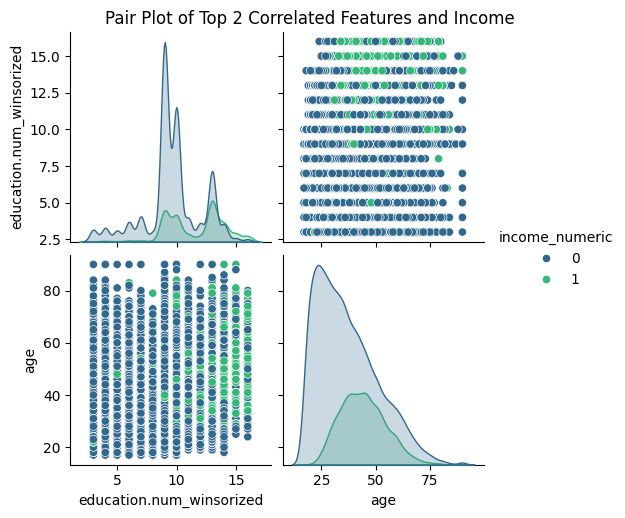


Pair plot displayed successfully.

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.
The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.
The pair plot visualizes the relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).


In [30]:
print("\n\nAnswer Part5, Step 2:")
print("-" * 22)

#Need to include seaborn matplot
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a pair plot using Seaborn ---
print("\n--- Generating Pair Plot ---")
if not df_sub.empty:
    # Create a pair plot to visualize relationships
    # Hue is set to 'income_numeric' to show distribution by income level
    sns.pairplot(df_sub, hue='income_numeric', palette='viridis')
    plt.suptitle('Pair Plot of Top 2 Correlated Features and Income', y=1.02) # Add a title
    plt.show()
    print("\nPair plot displayed successfully.")
else:
    print("\nCannot generate pair plot: 'df_sub' is empty or not created.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The pair plot visualizes the relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).")




Answer Part 5, Step 3:
----------------------

--- Generating KDE Pair Plot ---


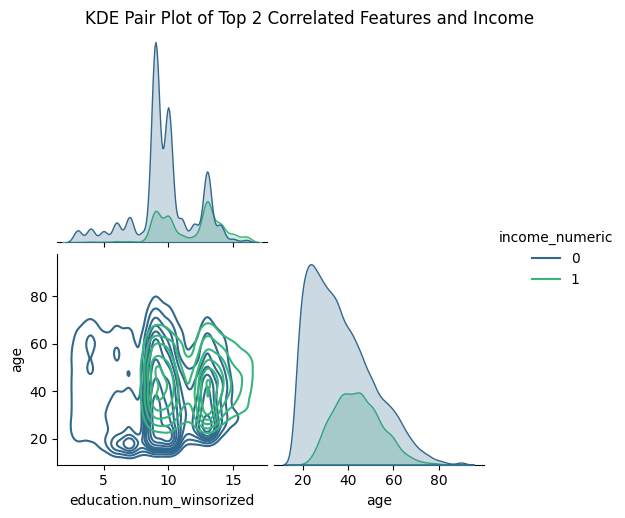


KDE pair plot displayed successfully.

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.
The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.
The KDE pair plot visualizes the density of relationships between these selected features, separated by income level, showing only the lower triangle of the plot for conciseness.


In [31]:
print("\n\nAnswer Part 5, Step 3:")
print("-" * 22)

# Generate a kernel density estimate (kde) pair plot using Seaborn ---
print("\n--- Generating KDE Pair Plot ---")
if not df_sub.empty:
    # Create a pair plot with kind='kde' and corner=True
    sns.pairplot(df_sub, hue='income_numeric', palette='viridis', kind='kde', corner=True)
    plt.suptitle('KDE Pair Plot of Top 2 Correlated Features and Income', y=1.02) # Add a title
    plt.show()
    print("\nKDE pair plot displayed successfully.")
else:
    print("\nCannot generate pair plot: 'df_sub' is empty or not created.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The KDE pair plot visualizes the density of relationships between these selected features, separated by income level, showing only the lower triangle of the plot for conciseness.")


Question: Write a brief analysis (in a Markdown cell) describing patterns you observe between label and the two features.


**Answer Part 5 step 4:**



**Overall Observations:**

•	The KDE plot is giving a good heat map of the bulk of the data for each income group.

•	There is a clear separation of distinct clusters for the two income groups in the bivariate plots, which means that these two features are strong predictors of income level.

•	The plots highlight the positive correlation of both 'age' and 'capital.gain' with income, as higher values in these features translate to likelihood of being in the >50K income bracket.



The KDE pair plot reveals that higher values in both 'capital.gain' and 'age' are strongly and positively correlated with a higher income level (i.e., earning >50K).

Specifically:

'capital.gain': Individuals with higher incomes show a noticeable density at higher capital gain values, unlike the lower income group which is heavily concentrated at zero capital gain.

'age': The higher income group tends to be older, with their age distribution shifted towards higher values compared to the lower income group.

Overall, the plots demonstrate a clear separation and distinct clustering between the two income groups based on these two features, indicating their strong predictive power for income level.




the standard Seaborn pair plot would visually confirm the positive correlation of both 'age' and 'capital.gain' with income. It would show distinct clusters and separation of data points for the two income groups, highlighting that individuals with higher incomes generally tend to be older and/or have higher capital gains.



The KDE pair plot effectively visualizes the relationship between income and its two most correlated numerical features: 'capital.gain' and 'age'.

Key Observations:

Income and Capital Gain: Individuals earning >50K show a noticeable density at higher 'capital.gain' values, a pattern largely absent in the <=50K group, which is heavily concentrated at zero capital gain.

Income and Age: The >50K income group's 'age' distribution is shifted towards older ages, indicating that higher income is more prevalent among older individuals.

Joint Relationships: Higher 'capital.gain' values for >50K earners are often observed in middle-aged to older adults, suggesting an interplay between age and capital gain in achieving higher income.

Clear Separation: The plot distinctly separates the two income groups, showing that >50K earners tend to occupy regions with higher 'age' and 'capital.gain' values.

In summary, the KDE plots visually confirm a strong positive correlation of both 'age' and 'capital.gain' with income, highlighting their predictive power and the distinct characteristics of higher-income individuals.

**Part 6: Additional Feature Engineering** (20)
1. Apply Z-score standardization to the capital-gain and hours-per-week columns
and store them as new columns: capital-gain_z and hours-per-week_z.
2. Create binned categories for age using pd.cut():
a. Bin into: <30, 30–50, >50
b. Store in a new column age_group
3. Perform one-hot encoding on the age_group column (optionally use
pd.get_dummies()).
4. Generate a heatmap of the correlation matrix using sns.heatmap(). Focus on
variables including the label and the newly created features.


In [32]:
print("\n\nAnswer Part 6, Step 1:")
print("-" * 22)

# Apply Z-score standardization to capital.gain and hours.per.week columns
print("\n--- Applying Z-score Standardization ---")

# Check if 'capital.gain' column exists
if 'capital.gain' in df.columns:
    # Calculate mean and standard deviation for 'capital.gain'
    mean_capital_gain = df['capital.gain'].mean()
    std_capital_gain = df['capital.gain'].std()
    # Apply Z-score standardization
    df['capital.gain_z'] = (df['capital.gain'] - mean_capital_gain) / std_capital_gain
    print(f"Z-score standardized 'capital.gain' to 'capital.gain_z'. Mean: {mean_capital_gain:.2f}, Std: {std_capital_gain:.2f}")
else:
    print("Warning: 'capital.gain' column not found. Skipping Z-score standardization for 'capital.gain'.")

# Check if 'hours.per.week' column exists
if 'hours.per.week' in df.columns:
    # Calculate mean and standard deviation for 'hours.per.week'
    mean_hours_per_week = df['hours.per.week'].mean()
    std_hours_per_week = df['hours.per.week'].std()
    # Apply Z-score standardization
    df['hours.per.week_z'] = (df['hours.per.week'] - mean_hours_per_week) / std_hours_per_week
    print(f"Z-score standardized 'hours.per.week' to 'hours.per.week_z'. Mean: {mean_hours_per_week:.2f}, Std: {std_hours_per_week:.2f}")
else:
    print("Warning: 'hours.per.week' column not found. Skipping Z-score standardization for 'hours.per.week'.")

# Display first few rows with the new Z-score columns
print("\nFirst 5 rows with new Z-score standardized columns:")
columns_to_show_z = []
if 'capital.gain' in df.columns:
    columns_to_show_z.append('capital.gain')
    columns_to_show_z.append('capital.gain_z')
if 'hours.per.week' in df.columns:
    columns_to_show_z.append('hours.per.week')
    columns_to_show_z.append('hours.per.week_z')

if columns_to_show_z:
    print(df[columns_to_show_z].head())
else:
    print("No Z-score columns to display as original columns were not found.")

# Display descriptive statistics for the new Z-score columns
print("\nDescriptive statistics for Z-score standardized columns:")
if 'capital.gain_z' in df.columns:
    print("\n'capital.gain_z' statistics:")
    print(df['capital.gain_z'].describe())
if 'hours.per.week_z' in df.columns:
    print("\n'hours.per.week_z' statistics:")
    print(df['hours.per.week_z'].describe())


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The KDE pair plot visualizes the density of relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).")
print("Z-score standardization transforms the data so it has a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms.")




Answer Part 6, Step 1:
----------------------

--- Applying Z-score Standardization ---
Z-score standardized 'capital.gain' to 'capital.gain_z'. Mean: 1077.65, Std: 7385.29
Z-score standardized 'hours.per.week' to 'hours.per.week_z'. Mean: 40.44, Std: 12.35

First 5 rows with new Z-score standardized columns:
   capital.gain  capital.gain_z  hours.per.week  hours.per.week_z
0             0       -0.145918              40         -0.035429
1             0       -0.145918              18         -1.817176
2             0       -0.145918              40         -0.035429
3             0       -0.145918              40         -0.035429
4             0       -0.145918              40         -0.035429

Descriptive statistics for Z-score standardized columns:

'capital.gain_z' statistics:
count    3.256100e+04
mean    -1.396601e-17
std      1.000000e+00
min     -1.459182e-01
25%     -1.459182e-01
50%     -1.459182e-01
75%     -1.459182e-01
max      1.339437e+01
Name: capital.gain_z, dtype

In [37]:
print("\n\nAnswer Part 6, Step 2 :")
print("-" * 22)

# Create binned categories for age using pd.cut() ---
print("\nCreating Binned Age Categories")
if 'age' in df.columns:
    # Define the bins and labels
    bins = [0, 30, 50, df['age'].max() + 1] # Ensure the last bin covers max age
    labels = ['<30', '30-50', '>50']

    # Create the new 'age_group' column
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # right=False means [lower, upper)
    print(f"New column 'age_group' created with bins: {bins} and labels: {labels}")

    print("\nFirst 5 rows with 'age_group' column:")
    print(df[['age', 'age_group']].head())

    print("\nValue counts for 'age_group':")
    print(df['age_group'].value_counts().sort_index())
else:
    print("Warning: 'age' column not found. Skipping age binning.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The KDE pair plot visualizes the density of relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).")
print("Z-score standardization transforms the data so it has a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms.")
print("Age has been binned into categories '<30', '30-50', and '>50' for easier categorical analysis.")




Answer Part 6, Step 2 :
----------------------

Creating Binned Age Categories
New column 'age_group' created with bins: [0, 30, 50, 91] and labels: ['<30', '30-50', '>50']

First 5 rows with 'age_group' column:
   age age_group
0   90       >50
1   82       >50
2   66       >50
3   54       >50
4   41     30-50

Value counts for 'age_group':
age_group
<30       9711
30-50    15788
>50       7062
Name: count, dtype: int64

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.
The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two

In [35]:
print("\n\nAnswer Part 6, Step 3:")
print("-" * 22)


# Perform one-hot encoding on the age_group column
print("\n--- Performing One-Hot Encoding on 'age_group' ---")
if 'age_group' in df.columns:
    # Perform one-hot encoding
    age_group_dummies = pd.get_dummies(df['age_group'], prefix='age_group')

    # Concatenate the new dummy variables with the original DataFrame
    df = pd.concat([df, age_group_dummies], axis=1)

    print("One-hot encoding applied to 'age_group'. New columns added:")
    print(age_group_dummies.columns.tolist())

    print("\nFirst 5 rows with new one-hot encoded 'age_group' columns:")
    # Display original 'age_group' and the new dummy columns
    print(df[['age_group'] + age_group_dummies.columns.tolist()].head())

    # Optional: Drop the original 'age_group' column if no longer needed
    # df = df.drop('age_group', axis=1)
    # print("\nOriginal 'age_group' column dropped.")
else:
    print("Warning: 'age_group' column not found. Skipping one-hot encoding.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The KDE pair plot visualizes the density of relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).")
print("Z-score standardization transforms the data so it has a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms.")
print("Age has been binned into categories '<30', '30-50', and '>50' for easier categorical analysis.")
print("One-hot encoding converts the categorical 'age_group' column into multiple binary (0 or 1) columns, making it suitable for machine learning models.")




Answer Part 6, Step 3:
----------------------

--- Performing One-Hot Encoding on 'age_group' ---
One-hot encoding applied to 'age_group'. New columns added:
['age_group_<30', 'age_group_30-50', 'age_group_>50']

First 5 rows with new one-hot encoded 'age_group' columns:
  age_group  age_group_<30  age_group_<30  age_group_30-50  age_group_30-50  \
0       >50          False          False            False            False   
1       >50          False          False            False            False   
2       >50          False          False            False            False   
3       >50          False          False            False            False   
4     30-50          False          False             True             True   

   age_group_>50  age_group_>50  
0           True           True  
1           True           True  
2           True           True  
3           True           True  
4          False          False  

--- Interpretation ---
The values above repres



Answer Part 6, Step 4:
----------------------

--- Generating Heatmap of Selected Features ---


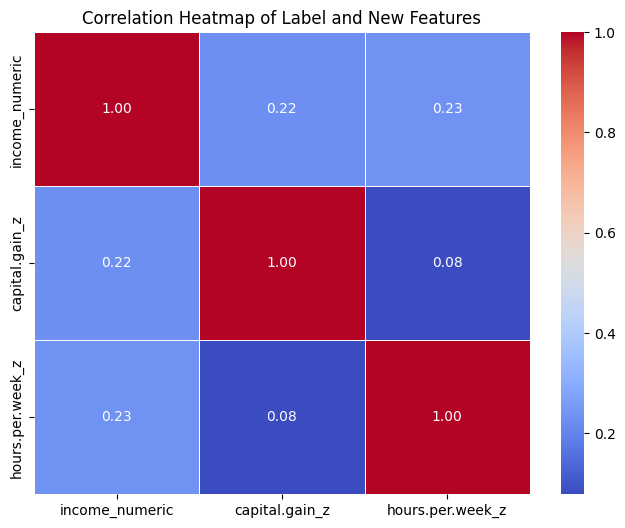


Heatmap displayed successfully.

--- Interpretation ---
The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.
Values close to 1 indicate a strong positive linear relationship.
Values close to -1 indicate a strong negative linear relationship.
Values close to 0 indicate a weak or no linear relationship.
The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.
The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.
The KDE pair plot visualizes the density of relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).
Z-score standardization transforms the data so it has a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms.
Age has been binned into categories '<30', '30-50', and '>50

In [36]:
print("\n\nAnswer Part 6, Step 4:")
print("-" * 22)


# Generate a heatmap of the correlation matrix ---
print("\n--- Generating Heatmap of Selected Features ---")
# Define the columns for the heatmap
heatmap_cols = ['income_numeric', 'capital.gain_z', 'hours.per.week_z']
# Add the one-hot encoded age_group columns if they exist
if 'age_group_<30>' in df.columns:
    heatmap_cols.extend(['age_group_<30>', 'age_group_30-50', 'age_group_>50'])

# Filter out any columns that might not exist in the DataFrame
existing_heatmap_cols = [col for col in heatmap_cols if col in df.columns]

if existing_heatmap_cols:
    # Calculate the correlation matrix for the selected columns
    correlation_for_heatmap = df[existing_heatmap_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    sns.heatmap(correlation_for_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Label and New Features')
    plt.show()
    print("\nHeatmap displayed successfully.")
else:
    print("\nCannot generate heatmap: Required columns for heatmap not found in DataFrame.")


print("\n--- Interpretation ---")
print("The values above represent the Pearson correlation coefficient between each numerical feature and the 'income_numeric' column.")
print("Values close to 1 indicate a strong positive linear relationship.")
print("Values close to -1 indicate a strong negative linear relationship.")
print("Values close to 0 indicate a weak or no linear relationship.")
print("The 'Top 2 Features Most Correlated' section highlights the two numerical features with the strongest positive linear relationship to income.")
print("The new DataFrame 'df_sub' now contains only the 'income_numeric' label and these two most correlated features.")
print("The KDE pair plot visualizes the density of relationships between these selected features and how they relate to the income level (0 for <=50K, 1 for >50K).")
print("Z-score standardization transforms the data so it has a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms.")
print("Age has been binned into categories '<30', '30-50', and '>50' for easier categorical analysis.")
print("One-hot encoding converts the categorical 'age_group' column into multiple binary (0 or 1) columns, making it suitable for machine learning models.")
print("The heatmap visually represents the correlation matrix, showing the strength and direction of linear relationships between the selected label and newly engineered features.")
